<a href="https://colab.research.google.com/github/IngerMasha/week11/blob/main/Introduction_to_SciPy_Exercises_XP_Ninja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [2]:
petal_length = df['petal length (cm)']
petal_width = df['petal width (cm)']


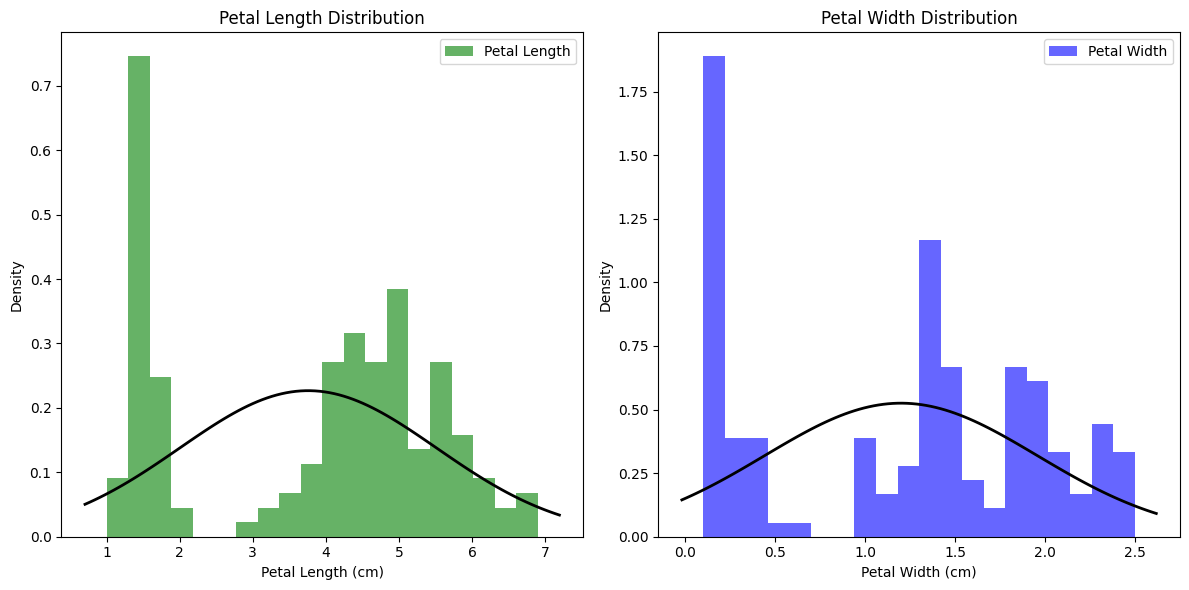

In [3]:
mu_length, std_length = stats.norm.fit(petal_length)
mu_width, std_width = stats.norm.fit(petal_width)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(petal_length, bins=20, density=True, alpha=0.6, color='g', label='Petal Length')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu_length, std_length)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Petal Length Distribution')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(petal_width, bins=20, density=True, alpha=0.6, color='b', label='Petal Width')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu_width, std_width)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Petal Width Distribution')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
ks_length = stats.kstest(petal_length, 'norm', args=(mu_length, std_length))
ks_width = stats.kstest(petal_width, 'norm', args=(mu_width, std_width))

print(f"KS test for Petal Length: statistic={ks_length.statistic}, p-value={ks_length.pvalue}")
print(f"KS test for Petal Width: statistic={ks_width.statistic}, p-value={ks_width.pvalue}")


KS test for Petal Length: statistic=0.19894200836859716, p-value=1.1160726642843068e-05
KS test for Petal Width: statistic=0.1736414962992952, p-value=0.00020003757835057755


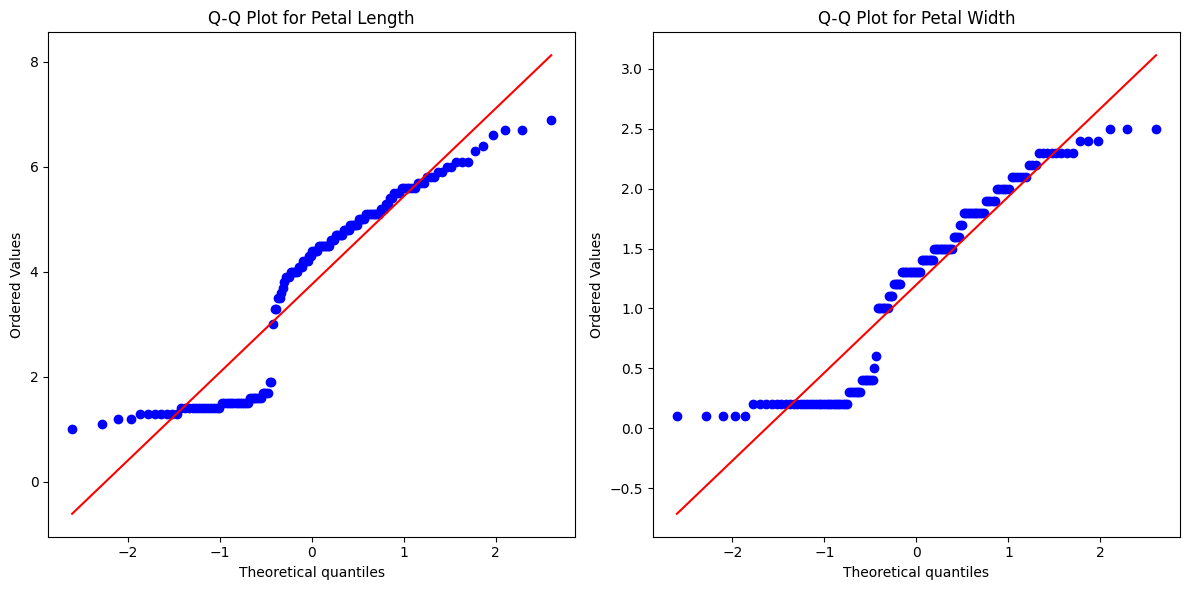

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
stats.probplot(petal_length, dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot for Petal Length')
stats.probplot(petal_width, dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot for Petal Width')
plt.tight_layout()
plt.show()
